<a href="https://colab.research.google.com/github/Melaka36/CodeZ/blob/main/XAI/ADASYNC_Model_Training(Without_CV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns # data visualization

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


In [ ]:
df=pd.read_csv("drive/MyDrive/4th_Year_Research/Implementation/Dataset/Pre-Processed-Dataset.csv")
df.shape

(3630, 25)

# Splitting data into X and Y

In [ ]:
#will drop the Nationality and International columns since they are highly correlated and only one nationality significantly dominates the data.
X = df.drop(columns=['Target'], axis=1)
Y = df['Target']

In [ ]:
X.shape

(3630, 24)

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

In [ ]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64



---

# Splitting Data Into Training and Testing

---



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# ADASYNC

In [ ]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)

# Apply ADASYN to the training data
X_train_resampled, Y_train_resampled = adasyn.fit_resample(X_train, Y_train)


In [ ]:
X_train, Y_train = X_train_resampled, Y_train_resampled

In [ ]:
count_of_ones = (Y_train == 1).sum()
count_of_zeros = (Y_train == 0).sum()
print(f"Number of rows with Target = 0: {count_of_zeros}")
print(f"Number of rows with Target = 1: {count_of_ones }")

Number of rows with Target = 0: 1696
Number of rows with Target = 1: 1773


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 24) (3469, 24) (726, 24)


# **Model Training**

# Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=1000)  # Increase max_iter value
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

Accuracy: 0.7727272727272727
Precision: 0.8004434589800443
Recall: 0.8279816513761468
F1-Score: 0.8139797068771139
ROC-AUC: 0.7588184118949699


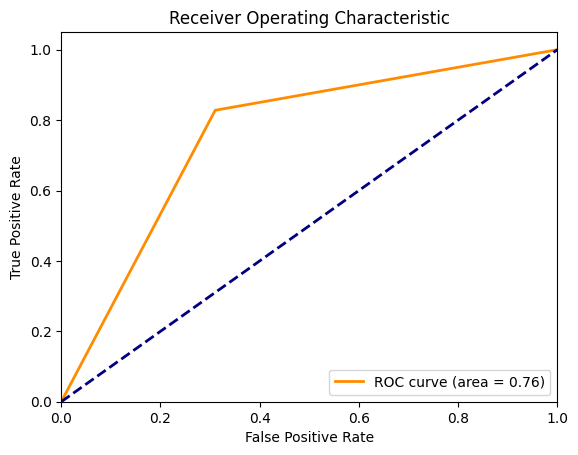

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[200  90]
 [ 75 361]]


<Axes: >

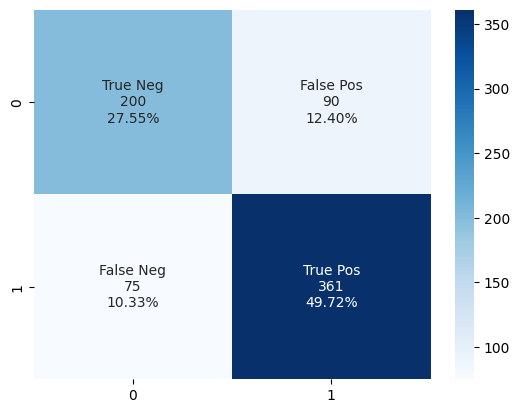

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 0.7641971749783799
Testing Accuracy: 0.7727272727272727


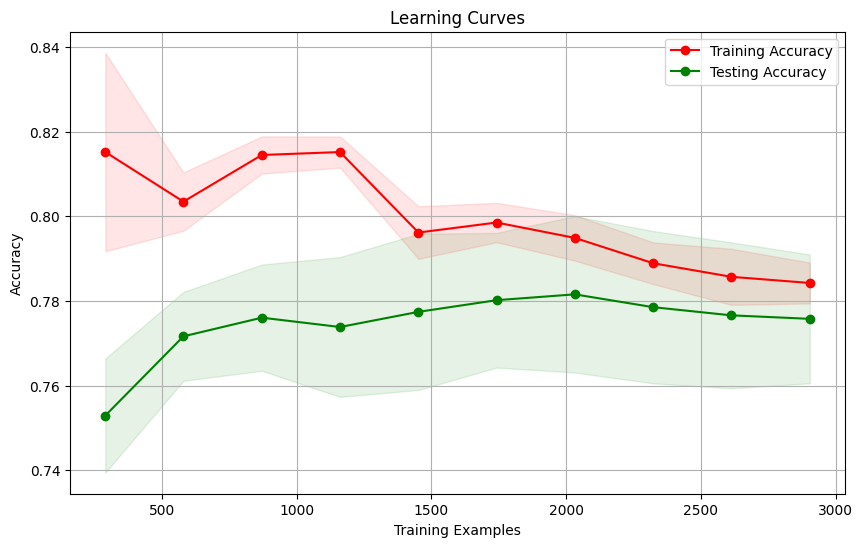

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

#without scaling
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without Cross Validation: ",accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without Cross Validation:  0.7796143250688705
Without Scaling and With CV:  0.7846759068661087


Accuracy: 0.7796143250688705
Precision: 0.815068493150685
Recall: 0.8188073394495413
F1-Score: 0.816933638443936
ROC-AUC: 0.7697484973109776


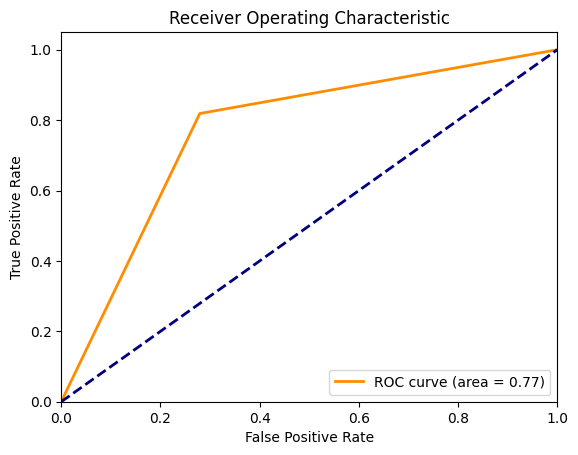

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
count_of_ones = (Y_train == 1).sum()
count_of_zeros = (Y_train == 0).sum()
print(f"Number of rows with Target = 0: {count_of_zeros}")
print(f"Number of rows with Target = 1: {count_of_ones }")

Number of rows with Target = 0: 1696
Number of rows with Target = 1: 1773


In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[209  81]
 [ 79 357]]


<Axes: >

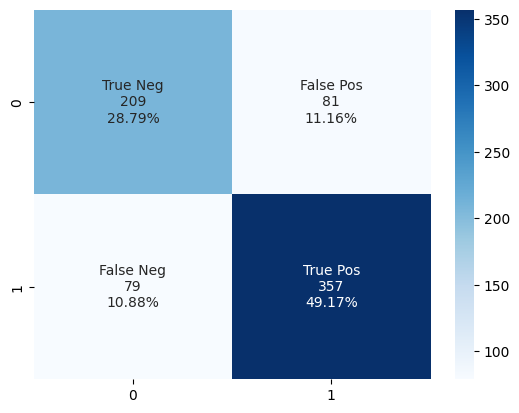

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 1.0
Testing Accuracy: 0.7796143250688705


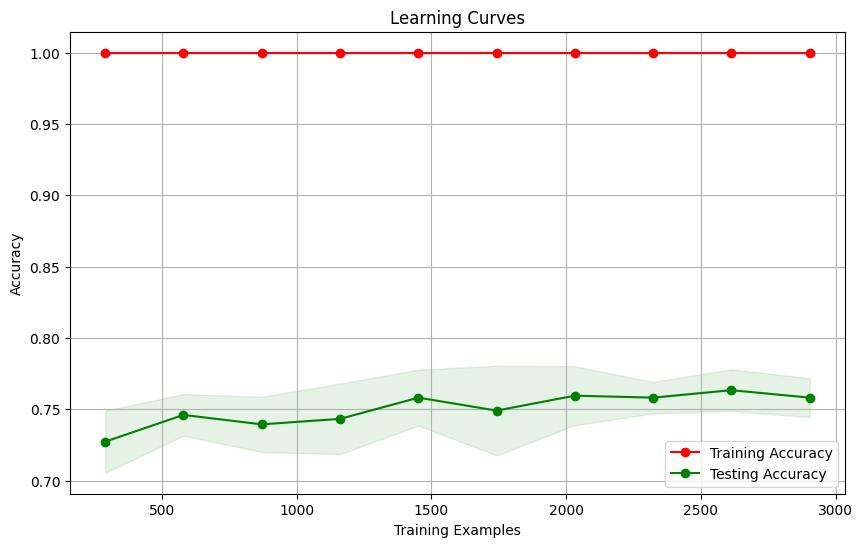

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and without CV:  0.8360881542699724
Without Scaling and With CV:  0.8302185537472304


Accuracy: 0.8360881542699724
Precision: 0.8423326133909287
Recall: 0.8944954128440367
F1-Score: 0.8676307007786429
ROC-AUC: 0.8213856374565012


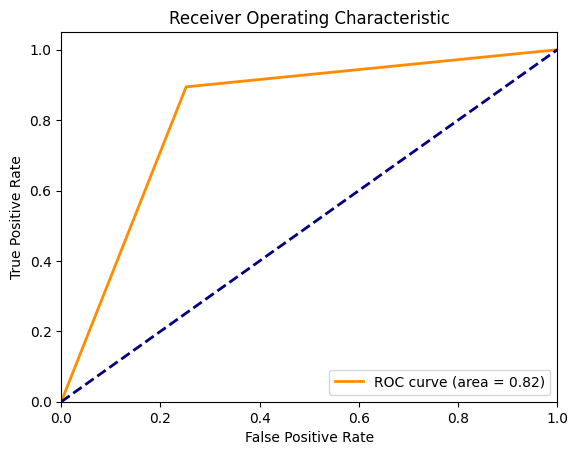

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[217  73]
 [ 46 390]]


<Axes: >

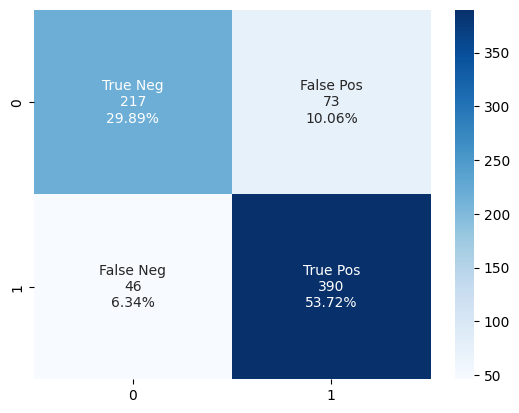

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 0.9264917843759009
Testing Accuracy: 0.8360881542699724


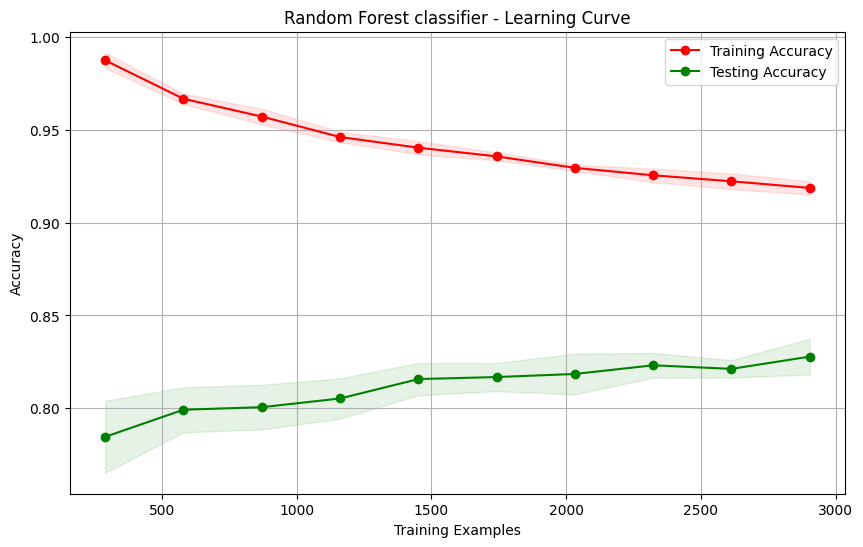

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Random Forest classifier - Learning Curve')
plt.legend(loc="best")
plt.grid()
plt.show()

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)

clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(Y_test,y_pred))

Without Scaling and without CV:  0.8016528925619835


Accuracy: 0.8016528925619835
Precision: 0.836405529953917
Recall: 0.8325688073394495
F1-Score: 0.8344827586206897
ROC-AUC: 0.7938706105662766


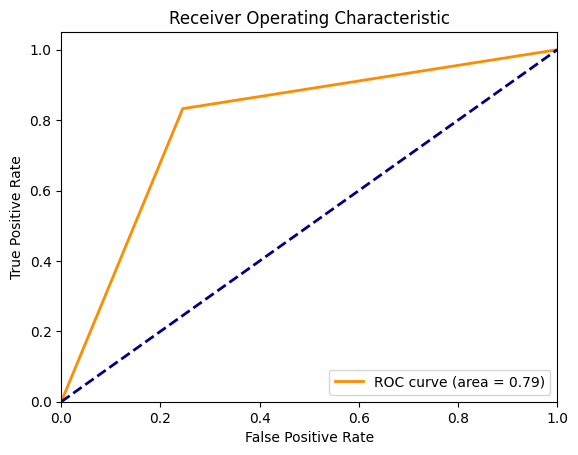

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# conf_matrix = confusion_matrix(Y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

In [ ]:
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in
#                 conf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in
#                      conf_matrix.flatten()/np.sum(conf_matrix)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# train_predictions = clf.predict(X_train)

# # Predict on the test set
# test_predictions = clf.predict(X_test)

# # Calculate training and testing accuracies
# train_accuracy = (train_predictions == Y_train).mean()
# test_accuracy = (test_predictions == Y_test).mean()

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", test_accuracy)

# # Plot learning curve
# plt.figure(figsize=(10, 6))
# train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
# plt.xlabel('Training Examples')
# plt.ylabel('Accuracy')
# plt.title('Learning Curves')
# plt.legend(loc="best")
# plt.grid()
# plt.show()

# Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(Y_test,y_pred))
scores = cross_val_score(clf, X_train, Y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7396694214876033
Without Scaling and With CV:  0.7313463044093885


Accuracy: 0.7396694214876033
Precision: 0.7465069860279441
Recall: 0.8577981651376146
F1-Score: 0.7982924226254001
ROC-AUC: 0.709933565327428


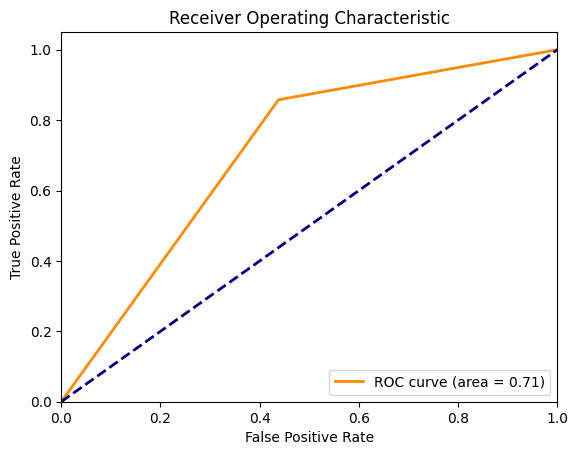

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, y_pred)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_pred)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[163 127]
 [ 62 374]]


<Axes: >

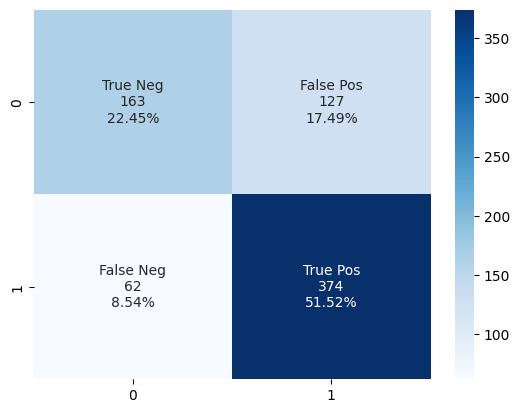

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 0.735370423753243
Testing Accuracy: 0.7396694214876033


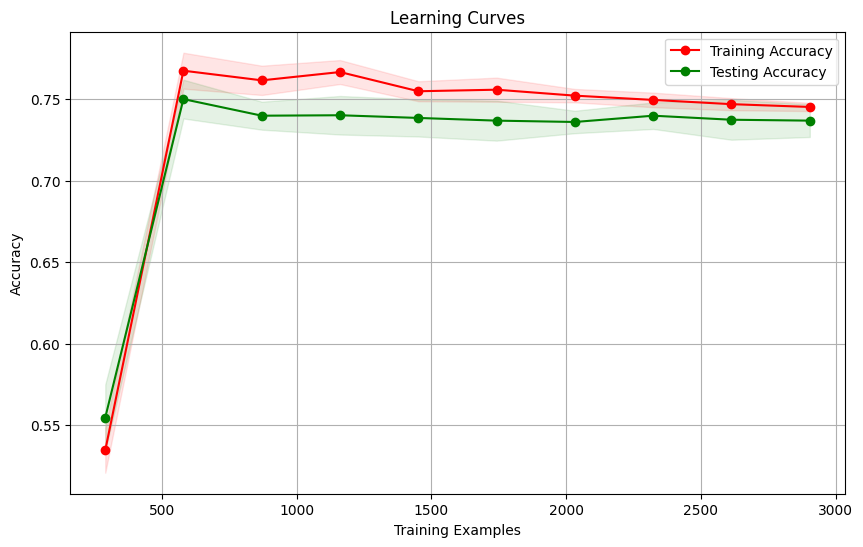

In [ ]:
train_predictions = clf.predict(X_train)

# Predict on the test set
test_predictions = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(train_predictions,Y_train)
test_accuracy = accuracy_score(Y_test,test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.grid()
plt.show()

# XGBoost

In [ ]:
bin_log = xgb.XGBClassifier(
    n_estimators=100,  # Adjust the number of estimators (trees) as needed
    max_depth=5,  # Adjust the depth of the trees as needed
    learning_rate=0.1,  # Adjust the learning rate as needed
    objective='binary:logistic',  # Use 'binary:logistic' for binary classification
    random_state=42  # Set a random seed for reproducibility
)
bin_log.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
target_prediction = bin_log.predict(X_test)
# print(target_prediction)

In [ ]:
data_accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", data_accuracy)

Accuracy: 0.8360881542699724


Accuracy: 0.8360881542699724
Precision: 0.8408602150537634
Recall: 0.8967889908256881
F1-Score: 0.8679245283018867
ROC-AUC: 0.8208082885162923


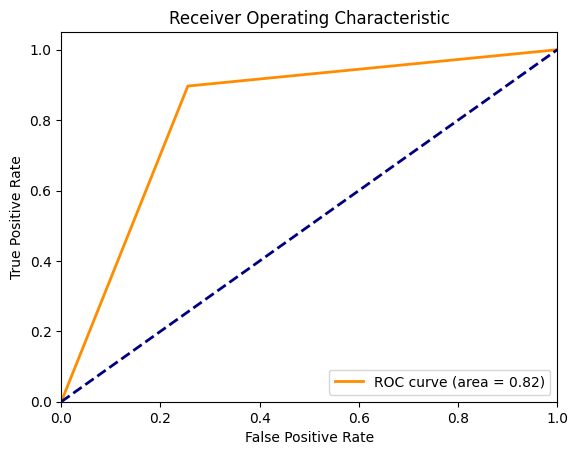

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(Y_test, target_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[216  74]
 [ 45 391]]


<Axes: >

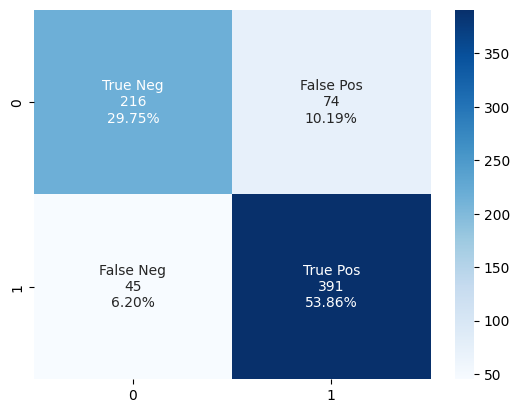

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

Training Accuracy: 0.9172672239838571
Testing Accuracy: 0.8360881542699724


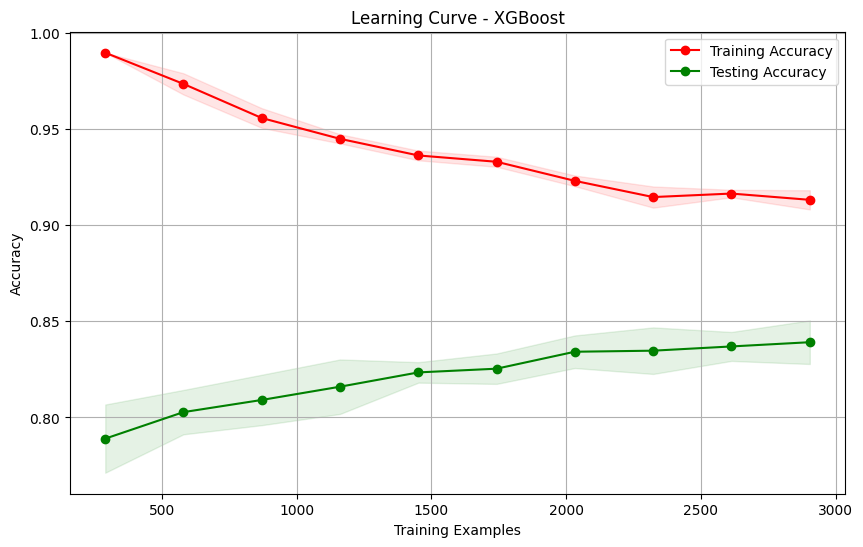

In [ ]:
train_predictions = bin_log.predict(X_train)

# Predict on the test set
test_predictions = bin_log.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(bin_log, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - XGBoost')
plt.legend(loc="best")
plt.grid()
plt.show()

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier on the training data
gb_classifier.fit(X_train, Y_train)

# Make predictions on the test data
target_prediction = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy}')
print(X_train.shape)
count_of_ones = (Y_train == 1).sum()
count_of_zeros = (Y_train == 0).sum()
print(f"Number of rows with Target = 0: {count_of_zeros}")
print(f"Number of rows with Target = 1: {count_of_ones }")

Accuracy: 0.8388429752066116
(3469, 24)
Number of rows with Target = 0: 1696
Number of rows with Target = 1: 1773


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8388429752066116
Precision: 0.8536585365853658
Recall: 0.8830275229357798
F1-Score: 0.8680947012401353
ROC-AUC: 0.827720658019614


Training Accuracy: 0.8685500144133756
Testing Accuracy: 0.8388429752066116


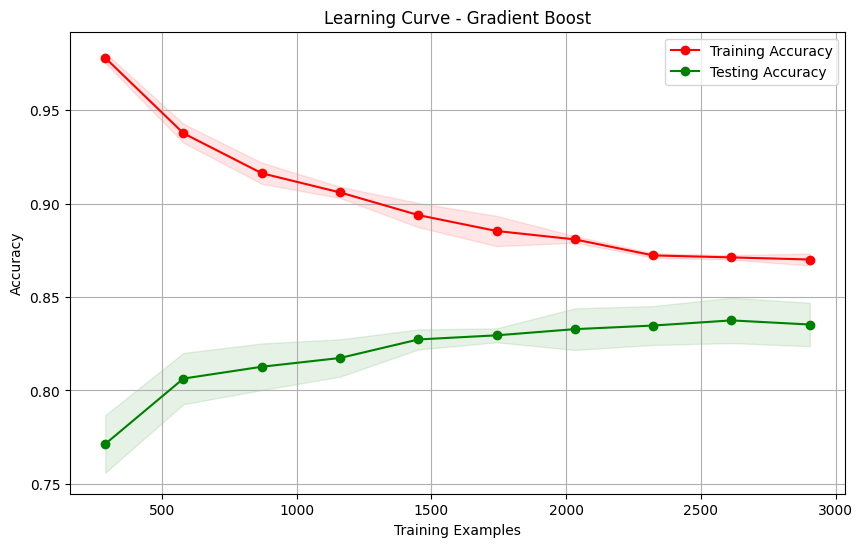

In [ ]:
train_predictions = gb_classifier.predict(X_train)

# Predict on the test set
test_predictions = gb_classifier.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(gb_classifier, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Gradient Boost')
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
pip install catboost


# CatBoost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100,  # Adjust the number of iterations as needed
                           depth=5,  # Adjust the depth of the trees as needed
                           learning_rate=0.1,  # Adjust the learning rate as needed
                           loss_function='Logloss',  # Use 'Logloss' for binary classification
                           random_seed=42)  # Set a random seed for reproducibility

model.fit(X_train, Y_train)

target_prediction = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy:.6f}')

0:	learn: 0.6376953	total: 48.4ms	remaining: 4.79s
1:	learn: 0.6035965	total: 50.6ms	remaining: 2.48s
2:	learn: 0.5677162	total: 52.4ms	remaining: 1.69s
3:	learn: 0.5429594	total: 54ms	remaining: 1.29s
4:	learn: 0.5192374	total: 55.8ms	remaining: 1.06s
5:	learn: 0.5024026	total: 57.4ms	remaining: 900ms
6:	learn: 0.4904340	total: 59.1ms	remaining: 785ms
7:	learn: 0.4795004	total: 60.8ms	remaining: 699ms
8:	learn: 0.4708602	total: 62.4ms	remaining: 631ms
9:	learn: 0.4647517	total: 64.2ms	remaining: 578ms
10:	learn: 0.4561470	total: 65.8ms	remaining: 533ms
11:	learn: 0.4501730	total: 67.5ms	remaining: 495ms
12:	learn: 0.4438745	total: 69.4ms	remaining: 465ms
13:	learn: 0.4373112	total: 71ms	remaining: 436ms
14:	learn: 0.4315803	total: 72.9ms	remaining: 413ms
15:	learn: 0.4263263	total: 74.7ms	remaining: 392ms
16:	learn: 0.4229127	total: 76.4ms	remaining: 373ms
17:	learn: 0.4203034	total: 78.2ms	remaining: 356ms
18:	learn: 0.4166577	total: 79.8ms	remaining: 340ms
19:	learn: 0.4124766	total

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8333333333333334
Precision: 0.8446389496717724
Recall: 0.8853211009174312
F1-Score: 0.864501679731243
ROC-AUC: 0.8202467573552674


Streaming output truncated to the last 5000 lines.
0:	learn: 0.6267317	total: 909us	remaining: 90.1ms
1:	learn: 0.5711348	total: 1.95ms	remaining: 95.4ms
2:	learn: 0.5167084	total: 2.89ms	remaining: 93.4ms
3:	learn: 0.4783890	total: 3.76ms	remaining: 90.4ms
4:	learn: 0.4495893	total: 4.5ms	remaining: 85.5ms
5:	learn: 0.4313405	total: 5.36ms	remaining: 84ms
6:	learn: 0.4047972	total: 6.26ms	remaining: 83.2ms
7:	learn: 0.3953566	total: 7.17ms	remaining: 82.5ms
8:	learn: 0.3710569	total: 8.07ms	remaining: 81.6ms
9:	learn: 0.3591515	total: 8.99ms	remaining: 81ms
10:	learn: 0.3516960	total: 9.91ms	remaining: 80.2ms
11:	learn: 0.3404599	total: 10.8ms	remaining: 79ms
12:	learn: 0.3339634	total: 11.7ms	remaining: 78.2ms
13:	learn: 0.3238492	total: 12.6ms	remaining: 77.2ms
14:	learn: 0.3200651	total: 13.5ms	remaining: 76.5ms
15:	learn: 0.3151691	total: 14.3ms	remaining: 75.2ms
16:	learn: 0.3111239	total: 15.1ms	remaining: 74ms
17:	learn: 0.3052066	total: 16ms	remaining: 72.9ms
18:	learn: 0.2948

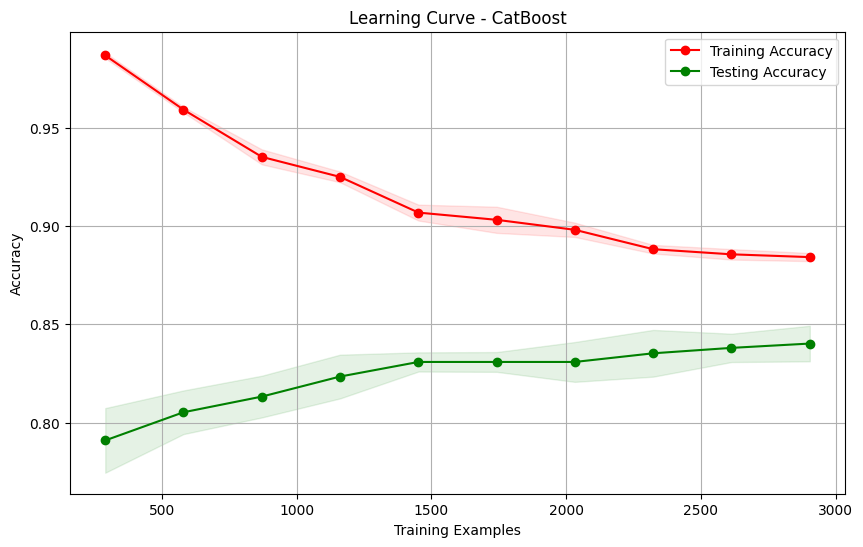

In [ ]:
train_predictions = model.predict(X_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - CatBoost')
plt.legend(loc="best")
plt.grid()
plt.show()

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=300,  # Adjust the number of estimators (trees) as needed
                  learning_rate=0.1)  # Adjust the learning rate as needed

model.fit(X_train, Y_train)

target_prediction = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(Y_test, target_prediction)
print(f'Accuracy: {accuracy:.6f}')

Accuracy: 0.825069


In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(Y_test, target_prediction)
print("Precision:", precision)

# Recall
recall = recall_score(Y_test, target_prediction)
print("Recall:", recall)

# F1-Score
f1 = f1_score(Y_test, target_prediction)
print("F1-Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(Y_test, target_prediction)
print("ROC-AUC:", roc_auc)

# ROC Curve (if you want to visualize it)
fpr, tpr, _ = roc_curve(Y_test, target_prediction)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8250688705234159
Precision: 0.844097995545657
Recall: 0.8692660550458715
F1-Score: 0.8564971751412428
ROC-AUC: 0.8139433723505218


Training Accuracy: 0.8157970596713751
Testing Accuracy: 0.8250688705234159


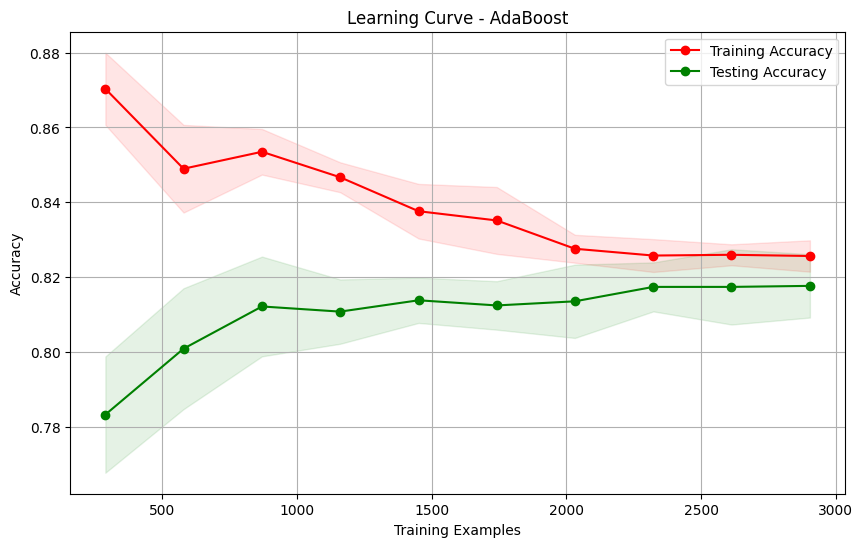

In [ ]:
train_predictions = model.predict(X_train)

# Predict on the test set
test_predictions = model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = (train_predictions == Y_train).mean()
test_accuracy = (test_predictions == Y_test).mean()

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot learning curve
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing Accuracy")
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - AdaBoost')
plt.legend(loc="best")
plt.grid()
plt.show()